# Lasso

In [7]:
# This program performs a LASSO linear regression from data stored in a csv file,
# outputs a linear regression model

# The data file must be in columns of numbers and with column labels
# The first column is the y values, the following columns are the predictors x1, x2, x3, etc.

# It must be saved as a csv file (e.g. use "Save As" in Excel and choose csv format).
# It must be saved in the same folder as this program.
# See the file data_Boston_house_price.csv for reference.

from sklearn import linear_model
import pandas as pd
from itertools import cycle
from sklearn.linear_model import lasso_path
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# A description of this dataset can be found in this link
# https://github.com/rupakc/UCI-Data-Analysis/tree/master/Boston%20Housing%20Dataset/Boston%20Housing

data = pd.read_csv("data_Boston_house_price.csv")
y = data["HOUSE_PRICE"]
X = data.drop("HOUSE_PRICE", axis=1)
# drop the row number
X = X.drop('Unnamed: 0', axis=1)

# About parameters
# The default alpha value is 1
# increase the max_iter to guarantee convergence
# The parameter of 'normalize' is confusing. It is recommended to set this parameter as False.
lasso_model = linear_model.Lasso(max_iter=10e7, normalize=False)
lasso_model.fit(X=X, y=y)
print("The coefficient of determination is:", lasso_model.score(X=X, y=y))

print("--- The coefficients of variables ---",)
df_coef_lasso = pd.DataFrame({"var": X.columns.values, "coef":lasso_model.coef_})
print(df_coef_lasso)

The coefficient of determination is: 0.6825842212709925
--- The coefficients of variables ---
        var      coef
0      CRIM -0.063437
1        ZN  0.049165
2     INDUS -0.000000
3      CHAS  0.000000
4       NOX -0.000000
5        RM  0.949811
6       AGE  0.020910
7       DIS -0.668790
8       RAD  0.264206
9       TAX -0.015212
10  PTRATIO -0.722966
11        B  0.008247
12    LSTAT -0.761115


In [5]:
# About parameters
# test Standardisation before using the lasso model
# The default alpha value is 1
# increase the max_iter to guarantee convergence
# The parameter of 'normalize' is confusing. It is recommended to set this parameter as False.
lasso_model = linear_model.Lasso(max_iter=10e7, normalize=False)
std_scaler = StandardScaler()
std_scaler.fit(X)
X_std = std_scaler.transform(X)
lasso_model.fit(X=X_std, y=y)
print("The coefficient of determination is:", lasso_model.score(X=X_std, y=y))

print("--- The coefficients of variables ---",)
df_coef_lasso = pd.DataFrame({"var": X.columns.values, "coef":lasso_model.coef_})
print(df_coef_lasso)

The coefficient of determination is: 0.6628192101128285
--- The coefficients of variables ---
        var      coef
0      CRIM -0.000000
1        ZN  0.000000
2     INDUS -0.000000
3      CHAS  0.000000
4       NOX -0.000000
5        RM  2.713355
6       AGE -0.000000
7       DIS -0.000000
8       RAD -0.000000
9       TAX -0.000000
10  PTRATIO -1.343549
11        B  0.180957
12    LSTAT -3.543381


(-1.25, 4.25, -3.515528268552263, 4.378667722183441)

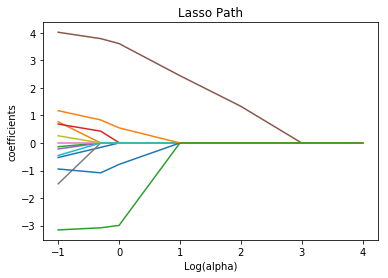

In [9]:
# visualise how the coefficients change with the lambda value using a plot of LASSO PATH
# standardise the X data by dividing each element by the standard deviation of the given column (axis=0)
# The returned DataFrame will have a std of 1 for each column
# See reference: https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_coordinate_descent_path.html#sphx-glr-auto-examples-linear-model-plot-lasso-coordinate-descent-path-py
import numpy as np

X_standardised = X/X.std(axis=0)

# alphas_lasso, coefs_lasso, _ = lasso_path(X_standardised, y.values.reshape(-1),alphas = [.1, .5, 1, 10, 100, 1000, 10000], fit_intercept=False)
alphas_lasso, coefs_lasso, _ = lasso_path(X_standardised, y.values.reshape(-1),alphas = [.1, .5, 1, 10, 100, 1000, 10000], fit_intercept=False)

log_alphas_lasso = np.log10(alphas_lasso)
for coef_l in coefs_lasso:
    l1 = plt.plot(log_alphas_lasso, coef_l)

plt.xlabel('Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso Path')
# add a legend
plt.axis('tight')

# TODO list

- Clarification of the **normalize** parameter in the LASSO function
- Adding a legend to the Lasso Path plot to clarify the mapping of variables and colours